In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from scipy.io import loadmat
from scipy import optimize as opt

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'ex5data1.mat',
 'Regularized Linear Regression and Bias vs Variance.ipynb']

# Loading data

In [3]:
data = loadmat('ex5data1.mat')

In [4]:
type(data)

dict

In [5]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [6]:
X = data['X']
y = data['y']

Xtrain = data['X']
ytrain = data['y']

Xtest = data['Xtest']
ytest = data['ytest']

Xval = data['Xval']
yval = data['yval']


In [7]:
print("Size of training data: ",Xtrain.shape)
print("Size of testing data: ",Xtest.shape)
print("Size of validation data: ",Xval.shape)


Size of training data:  (12, 1)
Size of testing data:  (21, 1)
Size of validation data:  (21, 1)


# Vizualizing data

Text(0, 0.5, 'water flowing')

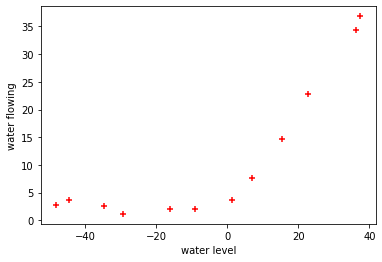

In [8]:
plt.scatter(Xtrain,ytrain,c='r',marker='+')
plt.xlabel('water level')
plt.ylabel('water flowing')


# Regularized Cost Function

In [9]:
Xtrain = np.c_[np.ones((len(Xtrain),1)),Xtrain]
m,n = Xtrain.shape

In [10]:
def hypothesis(x,theta):
    hx = np.dot(x,theta)
    return hx

In [11]:
def costfunction(theta,x,y,lambd):
    m , n = x.shape
    theta=theta.reshape((n,1))
    hx = hypothesis(x,theta)
    j = 1/(2*m) * (np.sum((hx-y)**2)) + (lambd/(2*m)*np.sum(theta[1:]**2))
    return j
print(costfunction(np.array([1,1]),Xtrain,ytrain,1))


303.9931922202643


# Regularized linear regressoin gradient

In [12]:
def gradient(theta,x,y,lambd):
    m,n = x.shape
    theta=theta.reshape((n,1))
    grad = np.zeros((n,1))
    hx = hypothesis(x,theta)
    grad = (1/m)* (np.dot(x.T,hx-y))
    grad[1:] = grad[1:] + (lambd/m)*theta[1:]

    return grad.flatten()

print(gradient(np.array([1,1]).reshape((2,1)),Xtrain,ytrain,1))


[-15.30301567 598.25074417]


In [13]:
initial_theta = np.zeros(n)
lambd = 0

In [14]:
theta  =  opt.fmin_tnc(func=costfunction,fprime=gradient,x0=initial_theta,args=(Xtrain,ytrain,lambd))
res = opt.minimize(costfunction,initial_theta.reshape((2,1)),args=(Xtrain,ytrain,lambd),method=None,jac=gradient,options={'maxiter':5000})
print("theta: ",theta[0])
print(res)

theta:  [13.08790351  0.36777923]
      fun: 22.373906495108915
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([ 3.70074342e-15, -1.58013348e-14])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])


# Predict

In [15]:
y_predict = hypothesis(Xtrain,theta[0].reshape((n,1)))

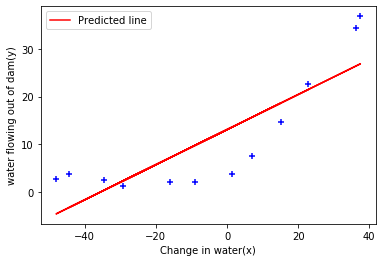

In [16]:
plt.scatter(Xtrain[:,1],ytrain,c='b',marker='+')
plt.plot(Xtrain[:,1],y_predict,c='r')
plt.xlabel('Change in water(x)')
plt.ylabel('water flowing out of dam(y)')
plt.legend(['Predicted line'])

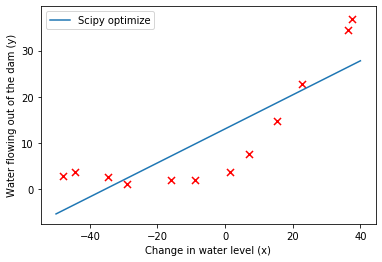

In [17]:
plt.plot(np.linspace(-50,40), (res.x[0]+ (res.x[1]*np.linspace(-50,40))), label='Scipy optimize')
plt.scatter(Xtrain[:,1], ytrain, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend()

# Learning Curves

In [18]:
def learningcurve(theta,x,y):
    m,n = x.shape
    hx = hypothesis(x,theta)
    error = 1/(2*m)*np.sum((hx-y)**2)
    return error

In [19]:
error_train = []
error_val = []
m_size = []
lambd=0
for i in range(1,12):
    m_size.append(i)
    theta  =  opt.fmin_tnc(func=costfunction,fprime=gradient,x0=initial_theta,args=(Xtrain[:i,:],ytrain[:i,:],lambd))
    t_theta = theta[0].reshape((n,1))
    error_train.append(learningcurve(t_theta,Xtrain[:i,:],ytrain[:i]))
    error_val.append(learningcurve(t_theta,np.c_[np.ones_like(yval),Xval],yval))
print("Error train: ",error_train)
print(error_val)
print(len(m_size))

Error train:  [1.0176953929799205e-18, 3.4671308818173964e-09, 3.286595045501273, 2.8426776893999373, 13.15404880911492, 19.443962512495464, 20.098521655088884, 18.17285869520002, 22.609405424954723, 23.26146159261182, 24.317249588044156]
[205.1210957127572, 110.30264077542824, 45.01023135119472, 48.36891025069481, 35.86516477234073, 33.829961521802765, 31.97098583107468, 30.862446314440877, 31.135997907318835, 28.936207468550815, 29.551431620665028]
11


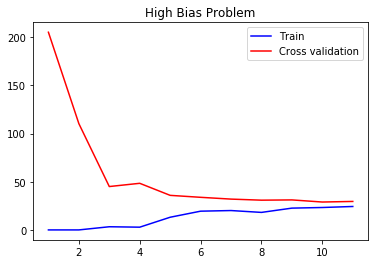

In [20]:
plt.plot(m_size,error_train,c='b',label='Train')
plt.plot(m_size,error_val,c='r',label='Cross validation')
plt.title("High Bias Problem")
plt.legend()

# Polynomial Regression

In [21]:
def polynomial(X,p):
    X_poly = np.zeros((len(X),p))
    X = X.flatten()
    for i in range(1,p+1):
        X_poly[:,i-1] = X**i
    return X_poly
    

In [22]:
def polyfeatures(x,d):
    m,n = x.shape
    xpoly = np.zeros((m,d))
    for i in range(m):
        for j in range(d):
            xpoly[i][j] = x[i]**(j+1)
    return xpoly

In [23]:
degree = 8
Xpoly = polyfeatures(X,degree)


# Mean Normalization

In [24]:
def meanNormalization(x):
    mu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0,ddof=1)
    X_norm = (x-mu)/sigma
    return X_norm,mu,sigma

In [25]:
X_Norm,mu,sigma = meanNormalization(Xpoly)

print(X_Norm[0])

[-0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792 -0.59087767
  0.3445158  -0.50848117]


In [26]:
Xpoly_val = polyfeatures(Xval,degree)
Xpoly_val = np.divide(Xpoly_val-mu,sigma)
Xpoly_val = np.c_[np.ones_like(yval),Xpoly_val]
print(Xpoly_val.shape)

(21, 9)


# Learning polynomial regression

In [27]:
X_Norm = np.c_[np.ones((m,1)),X_Norm] 
m,n = X_Norm.shape
print(X_Norm.shape)
print(X_Norm[0])

(12, 9)
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


In [28]:
initial_theta = np.zeros(n)
lambd=1

In [29]:
theta_t = opt.fmin_tnc(func=costfunction,fprime=gradient,x0=initial_theta,args=(X_Norm,y,lambd))
theta = theta_t[0].reshape((n,1))
print(theta)

[[11.21759469]
 [ 8.58517596]
 [ 5.212679  ]
 [ 3.59110948]
 [ 2.28293671]
 [ 1.76029575]
 [ 1.06813517]
 [ 1.10763142]
 [ 0.3939973 ]]


In [30]:
y_predict = hypothesis(X_Norm,theta)
print("Predicted values using polynomial regression: \n",y_predict)
print("\nOriginal values of y: \n",y)

Predicted values using polynomial regression: 
 [[ 3.3045914 ]
 [ 2.49648562]
 [33.62009189]
 [35.9101181 ]
 [ 3.27021266]
 [ 4.34437355]
 [12.7193927 ]
 [ 2.53922733]
 [ 6.83406181]
 [ 3.00617369]
 [ 8.78722038]
 [17.77918722]]

Original values of y: 
 [[ 2.13431051]
 [ 1.17325668]
 [34.35910918]
 [36.83795516]
 [ 2.80896507]
 [ 2.12107248]
 [14.71026831]
 [ 2.61418439]
 [ 3.74017167]
 [ 3.73169131]
 [ 7.62765885]
 [22.7524283 ]]


In [31]:
def plotfit(min_x, max_x, mu, sigma, theta, d):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape((-1,1))
    print(x.shape)
    X_poly = polyfeatures(x,d)
    X_poly = np.divide(X_poly - mu,sigma)
    X_poly = np.hstack((np.ones(len(X_poly)).reshape((-1,1)),X_poly))
    print(X_poly.shape)
    plt.plot(x,np.dot(X_poly,theta),'b',linewidth=2)
    plt.xlabel('Change in water(x)')
    plt.ylabel('water flowing out of dam(y)')
    plt.legend(['Predicted line'])

(2512, 1)
(2512, 9)


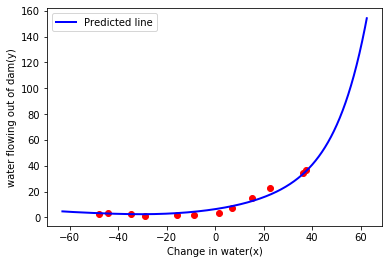

In [32]:

plt.scatter(X,y,c='r',marker='o')
plotfit(np.min(X), np.max(X), mu, sigma,theta, degree)

# Learning curve for high polynomial regression

In [33]:
error_train = []
error_val = []
m_size = []
lambd=1
for i in range(1,12):
    m_size.append(i)
    theta  =  opt.fmin_tnc(func=costfunction,fprime=gradient,x0=initial_theta,args=(X_Norm[:i,:],ytrain[:i,:],lambd))
    t_theta = theta[0].reshape((n,1))
    error_train.append(learningcurve(t_theta,X_Norm[:i,:],ytrain[:i]))
    error_val.append(learningcurve(t_theta,Xpoly_val,yval))
print("Error train: ",error_train)
print(error_val)
print(len(m_size))

Error train:  [2.2708705639924927e-16, 0.04577230386214513, 2.9113748267775197, 1.4994229894027813, 1.1991828999932237, 0.924510713925768, 1.5408976770604366, 1.422965557422377, 1.553733370826046, 1.4415765154581226, 1.3081364557336748]
[138.84677798724258, 143.52287165279466, 5.534710738204612, 6.609890601183352, 6.634074764214707, 8.291988317661373, 5.737172960463087, 5.516472011873907, 6.2397365967010865, 5.983019559319132, 6.043642522018098]
11


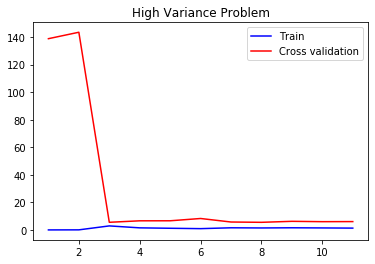

In [34]:
plt.plot(m_size,error_train,c='b',label='Train')
plt.plot(m_size,error_val,c='r',label='Cross validation')
plt.title("High Variance Problem")
plt.legend()

# Learning curve for best lambda value

In [35]:
error_train = []
error_val = []
lambda_vec = [0,0.001,0.003 ,0.01, 0.03, 0.1,0.2, 0.3, 1, 3, 10]
for i in range(len(lambda_vec)):
    lambd = lambda_vec[i]
    theta  =  opt.fmin_tnc(func=costfunction,fprime=gradient,x0=initial_theta,args=(X_Norm,ytrain,lambd))
    t_theta = theta[0].reshape((n,1))
    error_train.append(learningcurve(t_theta,X_Norm,ytrain))
    error_val.append(learningcurve(t_theta,Xpoly_val,yval))
print("Error train: ",error_train)
print(error_val)
print(len(m_size))

Error train:  [0.04265407398144096, 0.111777376640053, 0.17101545140801933, 0.2214627589876991, 0.2818631541326494, 0.4593174290809761, 0.6997112233017578, 0.9217816052076359, 2.076199311156103, 4.901373131303746, 16.092272723410886]
[20.778834518781597, 9.810009618579752, 16.395267330150467, 16.94421965907687, 12.828892521359995, 7.587025795816343, 5.386171390741566, 4.636760390994669, 4.2606029121606905, 3.822926887662373, 9.94555423485977]
11


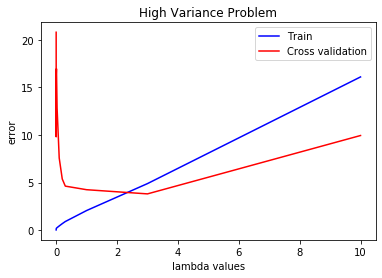

In [36]:
plt.plot(lambda_vec,error_train,c='b',label='Train')
plt.plot(lambda_vec,error_val,c='r',label='Cross validation')
plt.xlabel('lambda values')
plt.ylabel('error')
plt.title("High Variance Problem")
plt.legend()

# Test set Error

In [37]:
Xpoly_test = polyfeatures(Xtest,degree)
Xpoly_test = np.divide(Xpoly_test-mu,sigma)
Xpoly_test = np.c_[np.ones_like(ytest),Xpoly_test]
print(Xpoly_test.shape)

(21, 9)


In [38]:
lambd = 3


In [39]:
theta = opt.fmin_tnc(func=costfunction,fprime=gradient,x0=initial_theta,args=(Xpoly_test,ytest,lambd))
theta_t = theta[0]
test_set_error = learningcurve(theta_t,Xpoly_test,ytest)
print(test_set_error)

3908.1782625373867


In [41]:
Y_test_predict = hypothesis(Xpoly_test,theta_t.reshape((9,)))
print("Predicted values of y: \n",Y_test_predict)
print("\n original values of y: ",ytest)

Predicted values of y: 
 [ 4.03464929  3.32001868  2.60232956  7.65244624 16.2936364   2.94935051
  6.46065969 26.58030179 12.51427969 53.20139594  8.5346891   6.69042522
 28.71944743 38.53406736  9.1818644  23.04435834  5.34451264  7.21106092
  4.73160844  3.66658056 11.17003117]

 original values of y:  [[ 3.31688953]
 [ 5.39768952]
 [ 0.13042984]
 [ 6.1925982 ]
 [17.08848712]
 [ 0.79950805]
 [ 2.82479183]
 [28.62123334]
 [17.04639081]
 [55.38437334]
 [ 4.07936733]
 [ 8.27039793]
 [31.32355102]
 [39.15906103]
 [ 8.08727989]
 [24.11134389]
 [ 2.4773548 ]
 [ 6.56606472]
 [ 6.0380888 ]
 [ 4.69273956]
 [10.83004606]]


(2804, 1)
(2804, 9)


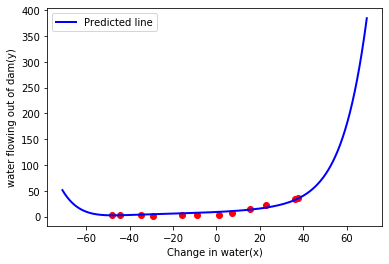

In [42]:
plt.scatter(X,y,c='r',marker='o')
plotfit(np.min(Xtest), np.max(Xtest), mu, sigma,theta_t.reshape((9,1)), degree)